### Newton–Cotes quadrature rules

In [7]:
from IPython.display import display, Math

def check_args(xs, ys, odd = False):
    if len(xs) != len(ys):
        raise Exception("invalid args len")
    if odd and (len(xs) % 2 == 0):
        raise Exception("This rule requires odd number of points")

def integrate_by_trapezoids(xs, ys):
    check_args(xs, ys)
    n = len(xs)
    I = 0
    for i in range(n - 1):
        I += (xs[i + 1] - xs[i]) * (ys[i + 1] + ys[i]) / 2
    return I

def integrate_by_Simpson(xs, ys):
    check_args(xs, ys, odd=True)
    n = len(xs)
    I = 0
    for i in range(0, n - 2, 2):
        I += (xs[i + 2] - xs[i]) * (ys[i + 2] + 4*ys[i + 1] + ys[i]) / 6
    return I

def apply_Runge_rule(xs, ys, method, order):
    check_args(xs, ys, odd=True)
    I = method(xs, ys)
    I2 = method(xs[::2], ys[::2])
    return I + (I - I2) / (2**order - 1)

xs = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
fs = [1.0000000, 0.989616, 0.958851, 0.908852, 0.841471, 0.759188, 0.664997, 0.562278, 0.454649]

print("Метод трапеций:")
display(Math(f"I_{{tr}} = {integrate_by_trapezoids(xs, fs)}"))
print("Метод Симпсона:")
display(Math(f"I_{{Sp}} = {integrate_by_Simpson(xs, fs)}"))
print("Правило Рунге для метода трапеций:")
display(Math(f"I_{{Rg}} = {apply_Runge_rule(xs, fs, integrate_by_trapezoids, 2)}"))
print("Отсюда видно, что правило Рунге делает из метода трапеций метод Симпсона.")

Метод трапеций:


<IPython.core.display.Math object>

Метод Симпсона:


<IPython.core.display.Math object>

Правило Рунге для метода трапеций:


<IPython.core.display.Math object>

Отсюда видно, что правило Рунге делает из метода трапеций метод Симпсона.


### Fast oscillating function:

$$\rho(x) = \sin(100x)$$

$$f(x) = \frac{1}{1 + x}$$

$$I = \int_0^1 f(x)\rho(x)dx $$

Точное значение $I = 0.0056992807896$

Требуемая точность $\varepsilon = 10^{-6}$

Оценка сетки для метода трапеций:

$g(x) = f(x)\rho(x)$

$M_2 = \max\limits_{[0;1]} |\ddot{g}(x)| > 9552$

$\frac{M_2}{12(n-1)^2} < \varepsilon$

$n > 1 + \sqrt{\frac{M_2}{12\varepsilon}} \Rightarrow n = 28215$

In [8]:
from math import *

def apply_grid(f, n, begin, end):
    xs = [begin + i * (end - begin) / (n - 1) for i in range(n)]
    return xs, [f(x) for x in xs]

def f(x):
    return sin(100 * x) / (1 + x)

def rewrite_number(number):
    mantissa, exponent = f"{number:.1e}".split('e')
    return f"{mantissa} \\cdot 10^{{{int(exponent)}}}"

I_0 = 0.0056992807896
I_tr = integrate_by_trapezoids(*apply_grid(f, 28215, 0, 1))
display(Math(f"I_{{tr}} = {I_tr}"))
display(Math(f"|I_{{tr}} - I| = {rewrite_number(abs(I_tr - I_0))}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Квадратура Гаусса

$$I = \frac{1}{2}\int_{-1}^1 \tilde{f}(x)\tilde{\rho}(x)dx = \int_{-1}^1 g(x) dx$$

$\tilde{f}(x) = f(\frac{x+1}{2}) = \frac{2}{x+3}$

$\tilde{\rho}(x) = \rho(\frac{x+1}{2}) = \sin(50(x + 1))$

$g(x) = \frac{1}{2} \tilde{f}(x) \tilde{\rho}(x) = \frac{\sin(50(x + 1))}{x+3}$

Для вычисления интеграла возьмём 35 точек:

In [31]:
Legendre_roots = [-0.99770657, -0.98793576, -0.97043762, -0.94534515, -0.91285426, -0.87321913,
 -0.8267499,  -0.77381025, -0.7148145,  -0.65022436, -0.58054534, -0.50632277,
 -0.42813754, -0.34660155, -0.26235294, -0.17605106, -0.08837134,  0,
  0.08837134,  0.17605106,  0.26235294,  0.34660155,  0.42813754,  0.50632277,
  0.58054534,  0.65022436,  0.7148145,   0.77381025,  0.8267499,   0.87321913,
  0.91285426,  0.94534515,  0.97043762,  0.98793576,  0.99770657]

cs = [0.00588343, 0.01365083, 0.02132298, 0.02882926, 0.03611012, 0.04310842,
 0.04976937, 0.05604082, 0.06187367, 0.06722229, 0.07204479, 0.07630346,
 0.07996494, 0.08300059, 0.08538665, 0.08710445, 0.08814053, 0.08848679,
 0.08814053, 0.08710445, 0.08538665, 0.08300059, 0.07996494, 0.07630346,
 0.07204479, 0.06722229, 0.06187367, 0.05604082, 0.04976937, 0.04310842,
 0.03611012, 0.02882926, 0.02132298, 0.01365083, 0.00588343]

g = lambda x: sin(50*(x+1)) / (x + 3)
I_Gs = sum([c * g(x) for c,x in zip(cs, Legendre_roots)])

I_0 = 0.0056992807896
display(Math(f"I_{{Gs}} = {I_Gs}"))
display(Math(f"|I_{{Gs}} - I| = {rewrite_number(abs(I_Gs - I_0))}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Вычисление интеграла $\int\limits_0^4 f(x)\sin(50x)dx$ с помощью построения естественного сплайна


|   |   |   |   |   |   |
|---|---|---|---|---|---|
| x  | 0 | 1  | 2      | 3 | 4       |
|f(x)| 0 | 0.5|0.86603 | 1 | 0.86603 |

$I_{bp}$ - значение полученное интегрированием по частям

$I_{tr}$ - значение полученное методом трапеций с разбиением на $10^4$ отрезков

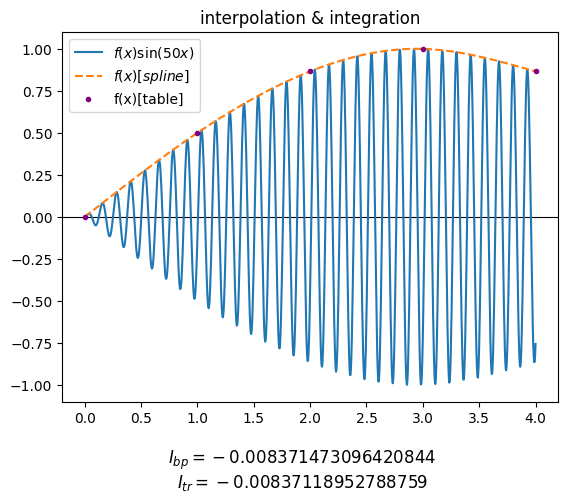

In [12]:
from splinelib import NaturalSpline
import matplotlib.pyplot as plt

xs = [0, 1, 2, 3, 4]
fs = [0, 0.5, 0.86603, 1, 0.86603]

f = NaturalSpline(xs, fs)

g = lambda x: f(x) * sin(50 * x)

# integrate f(x)sin(50x) by parts
I_bp = f.integrate_with_oscillations(50)

outline_xs, outline_ys = apply_grid(f, 1000, 0, 4)
g_xs, g_ys = apply_grid(g, 1000, 0, 4)

I_tr = integrate_by_trapezoids(*apply_grid(g, 10000, 0, 4))

plt.title("interpolation & integration")
plt.axhline(0, 0, 5, color='black', linewidth=0.8)
plt.plot(g_xs, g_ys, label="$f(x)\\sin(50x)$")
plt.plot(outline_xs, outline_ys, "--", label="$f(x)[spline]$")
plt.plot(xs, fs, ".", color="purple", label="f(x)[table]")
plt.figtext(0.5, -0.02, f"$I_{{bp}} = {I_bp}$", ha='center', fontsize=12)
plt.figtext(0.5, -0.07, f"$I_{{tr}} = {I_tr}$", ha='center', fontsize=12)
plt.legend()
plt.show()
